In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor, export_text

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('./Steels_kaggle.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [7]:
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', ' Temperature (°C)']]
Y = df[' 0.2% Proof Stress (MPa)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

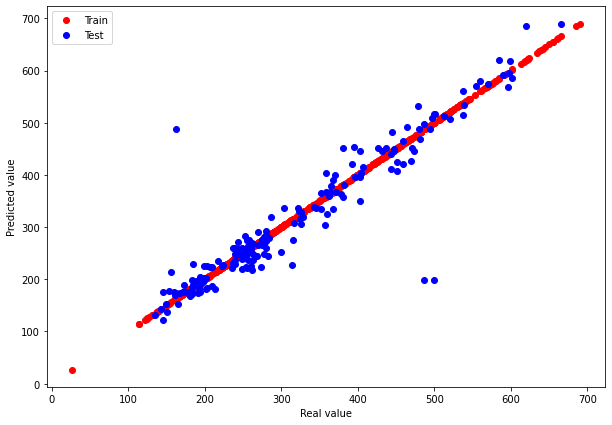

In [9]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, reg.predict(X_train), 'or', label='Train')
plt.plot(y_test, reg.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [11]:
mse_test = mse(y_test, reg.predict(X_test), squared=False)
mse_train = mse(y_train, reg.predict(X_train), squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 45.27746879329573 and MSE for train is 0.0


In [12]:
scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.fit_transform(X_test)

In [13]:
reg = DecisionTreeRegressor()
reg.fit(Xsc_train,y_train)

DecisionTreeRegressor()

In [14]:
mse_test = mse(y_test, reg.predict(Xsc_test), squared=False)
mse_train = mse(y_train, reg.predict(Xsc_train), squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 47.31599389940493 and MSE for train is 0.0


### The result without scaling is better. This can be explained by the formulation of the DecisionTree algorithm

In [33]:
num_folds = 5
model = DecisionTreeRegressor()

params = {'max_depth': np.arange(2, 8), 'min_samples_leaf': np.arange(2, 6), 
          'min_samples_split': np.arange(2, 8), 'max_leaf_nodes': np.arange(30, 50)}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=num_folds, n_jobs=8 )
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=8,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_leaf_nodes': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49]),
                         'min_samples_leaf': array([2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])},
             scoring='neg_mean_squared_error')

In [34]:
grid.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 49,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [35]:
num_folds = 5
model = DecisionTreeRegressor()

params = {'max_depth': np.arange(7, 12), 'min_samples_leaf': np.arange(3, 7), 
          'min_samples_split': np.arange(1, 5), 'max_leaf_nodes': np.arange(100, 200)}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=num_folds, n_jobs=8 )
grid.fit(X_train,y_train)

grid.best_params_

/home/user/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10000 fits failed out of a total of 40000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater th

{'max_depth': 11,
 'max_leaf_nodes': 143,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [36]:
num_folds = 5
model = DecisionTreeRegressor()

params = {'max_depth': np.arange(15, 20), 'min_samples_leaf': np.arange(3, 6), 
          'min_samples_split': np.arange(1, 4), 'max_leaf_nodes': np.arange(140, 160)}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=num_folds, n_jobs=8 )
grid.fit(X_train,y_train)

grid.best_params_

/home/user/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1500 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/home/user/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 

{'max_depth': 17,
 'max_leaf_nodes': 151,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [37]:
num_folds = 5
model = DecisionTreeRegressor()

params = {'max_depth': np.arange(15, 20), 'min_samples_leaf': np.arange(3, 6), 
          'min_samples_split': np.arange(3, 6), 'max_leaf_nodes': np.arange(140, 160)}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=num_folds, n_jobs=8 )
grid.fit(X_train,y_train)

grid.best_params_

{'max_depth': 16,
 'max_leaf_nodes': 156,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

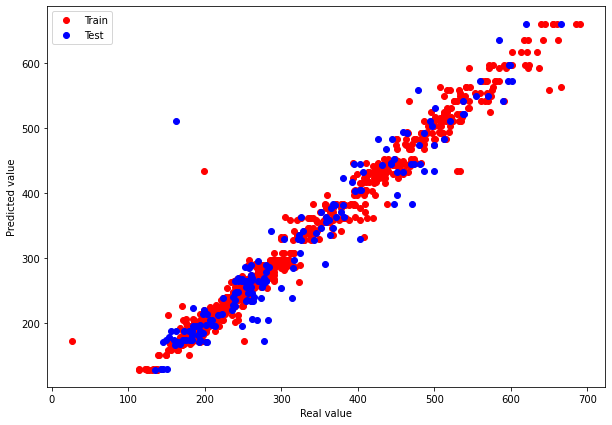

In [38]:
reg = grid.best_estimator_

fig = plt.figure(figsize=(10,7))

plt.plot(y_train, reg.predict(X_train), 'or', label='Train')
plt.plot(y_test, reg.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

In [39]:
mse_test = mse(y_test, reg.predict(X_test), squared=False)
mse_train = mse(y_train, reg.predict(X_train), squared=False)
print("MSE for test is", mse_test, "and MSE for train is", mse_train)

MSE for test is 37.78028990299563 and MSE for train is 20.792320129620588


### Thus, DecisionTree gives a better result than linear regression, a comparable result to polynomial regression and loses to the SVR